References:

https://www.ncei.noaa.gov/access/world-ocean-atlas-2023/bin/woa23.pl

https://www.ncei.noaa.gov/thredds-ocean/catalog/woa23/DATA/temperature/netcdf/B5C2/1.00/catalog.html?dataset=woa23/DATA/temperature/netcdf/B5C2/1.00/woa23_B5C2_t00_01.nc

https://www.ncei.noaa.gov/thredds-ocean/dodsC/woa23/DATA/temperature/netcdf/B5C2/1.00/woa23_B5C2_t00_01.nc.html

https://www.ncei.noaa.gov/data/oceans/woa/WOA23/DOCUMENTATION/WOA23_Product_Documentation.pdf


In [17]:
!pip install netCDF4 -q
!pip install Basemap -q
# !pip install mpl_tools -q

In [18]:
import datetime
from datetime import timedelta, datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import optimize

In [19]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dataset = nc.Dataset('/content/woa23_B5C2_t00_01.nc')
print(dataset.variables.keys())

# Extract latitude, longitude, depth, and temperature
lat_o = dataset['lat'][:]
lon_o = dataset['lon'][:]
depth = dataset['depth'][:]
time = dataset['time'][:]

t_mn = dataset['t_mn'][-1, :, :, :]  # Shape: (depth, lat, lon) assuming time=latest month in 2022

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp', 't_sdo', 't_sea'])


# Plotting Temperature vs Depth for Coral Sea, Yellow Sea and Java Sea

Coral Sea

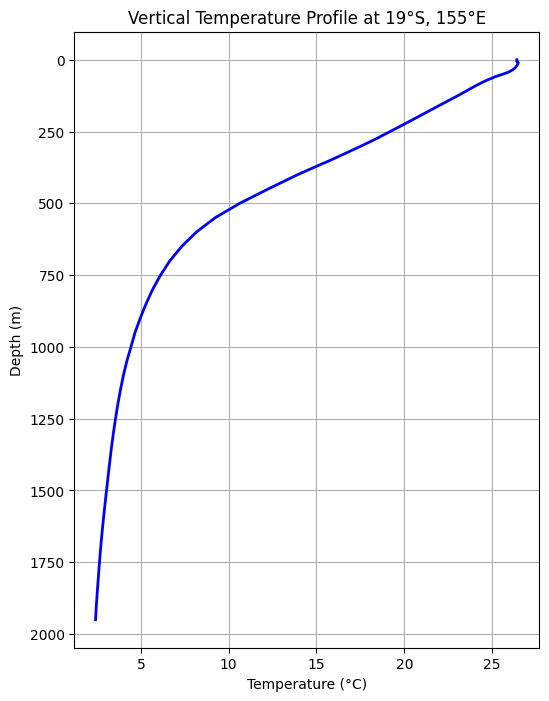

In [20]:
# Nearest lat/lon indices
lat_indices = [70, 71]  # Corresponding to -19.5°S and -18.5°S
lon_indices = [334, 335]  # Corresponding to 154.5°E and 155.5°E

# Removes masked values
valid_temperatures_00 = t_mn[:, lat_indices[0], lon_indices[0]].compressed()[:66]
valid_temperatures_01 = t_mn[:, lat_indices[0], lon_indices[1]].compressed()[:66]
valid_temperatures_10 = t_mn[:, lat_indices[1], lon_indices[0]].compressed()[:66]
valid_temperatures_11 = t_mn[:, lat_indices[1], lon_indices[1]].compressed()

valid_depths = depth[~t_mn[:, lat_indices[1], lon_indices[1]].mask] # has least depth at 66 = 1950m

# Extract temperature at these four points and take the mean
temperature_profile = np.mean([
    valid_temperatures_00,
    valid_temperatures_01,
    valid_temperatures_10,
    valid_temperatures_11
], axis=0)

# Plot vertical temperature distribution
plt.figure(figsize=(6, 8))
plt.plot(temperature_profile, valid_depths, linestyle='-', linewidth=2, color='b')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Label
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Vertical Temperature Profile at 19°S, 155°E")
plt.grid()
plt.show()

Yellow Sea

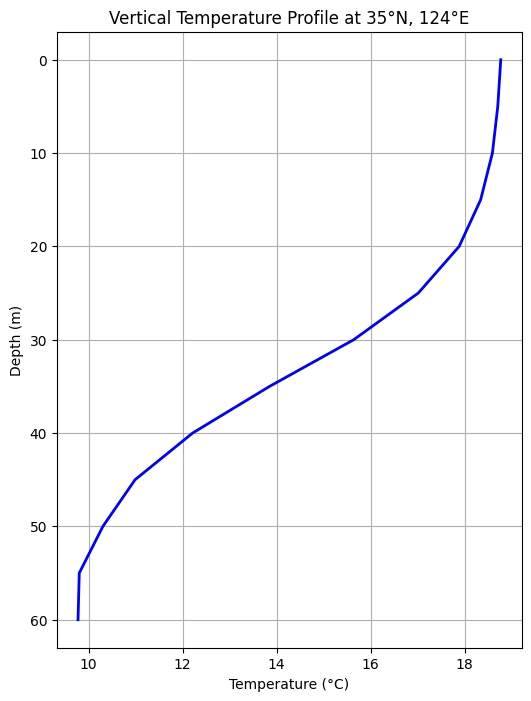

In [21]:
# Nearest lat/lon indices
lat_indices = [124, 125]  # Corresponding to 34.5°N and 35.5°N, corresponding to lat_a indices
lon_indices = [303, 304]  # Corresponding to 123.5°E and 124.5°E, corresponding to lon_o indices

# Removes masked values
valid_temperatures_00 = t_mn[:, lat_indices[0], lon_indices[0]].compressed()
valid_temperatures_01 = t_mn[:, lat_indices[0], lon_indices[1]].compressed()[:13]
valid_temperatures_10 = t_mn[:, lat_indices[1], lon_indices[0]].compressed()
valid_temperatures_11 = t_mn[:, lat_indices[1], lon_indices[1]].compressed()[:13]

valid_depths = depth[~t_mn[:, lat_indices[0], lon_indices[0]].mask] # has least depth at 13 = 60m

# Extract temperature at these four points and take the mean
temperature_profile = np.mean([
    valid_temperatures_00,
    valid_temperatures_01,
    valid_temperatures_10,
    valid_temperatures_11
], axis=0)

# Plot vertical temperature distribution
plt.figure(figsize=(6, 8))
plt.plot(temperature_profile, valid_depths, linestyle='-', linewidth=2, color='b')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Label
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Vertical Temperature Profile at 35°N, 124°E")
plt.grid()
plt.show()

Java Sea

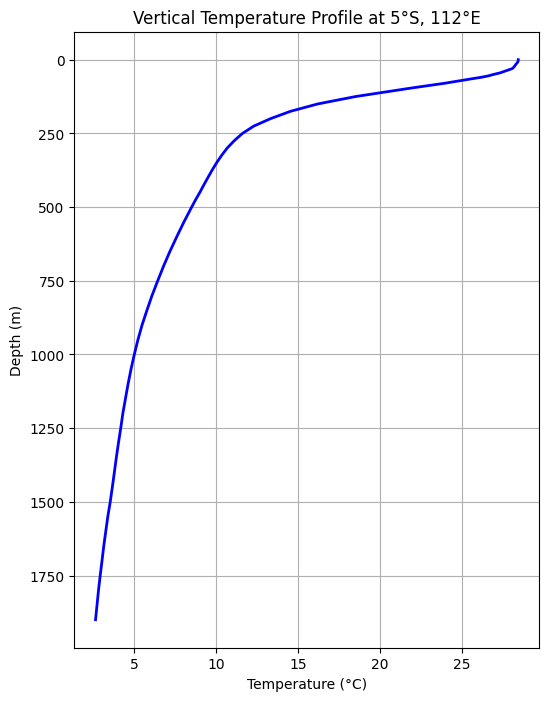

In [22]:
# Nearest lat/lon indices
lat_indices = [79, 80]  # Corresponding to 10.5°S and 9.5°S, corresponding to lat_a indices
lon_indices = [289, 290]  # Corresponding to 109.5°E and 110.5°E, corresponding to lon_o indices

# Removes masked values
valid_temperatures_00 = t_mn[:, lat_indices[0], lon_indices[0]].compressed()[:65]
valid_temperatures_01 = t_mn[:, lat_indices[0], lon_indices[1]].compressed()[:65]
valid_temperatures_10 = t_mn[:, lat_indices[1], lon_indices[0]].compressed()[:65]
valid_temperatures_11 = t_mn[:, lat_indices[1], lon_indices[1]].compressed()

valid_depths = depth[~t_mn[:, lat_indices[1], lon_indices[1]].mask] # has least depth at 65 = 1950m

# Extract temperature at these four points and take the mean
temperature_profile = np.mean([
    valid_temperatures_00,
    valid_temperatures_01,
    valid_temperatures_10,
    valid_temperatures_11
], axis=0)

# Plot vertical temperature distribution
plt.figure(figsize=(6, 8))
plt.plot(temperature_profile, valid_depths, linestyle='-', linewidth=2, color='b')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Label
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Vertical Temperature Profile at 5°S, 112°E")
plt.grid()
plt.show()